In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
#Load Dataset

data = pd.read_csv('C:/Users/Abhishek/HousingData.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
# Check for missing values
print("Missing values:", data.isnull().sum())

Missing values: CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [4]:
#Data Preprocessing

data.isnull().sum()
data.fillna(data.mean(), inplace=True)

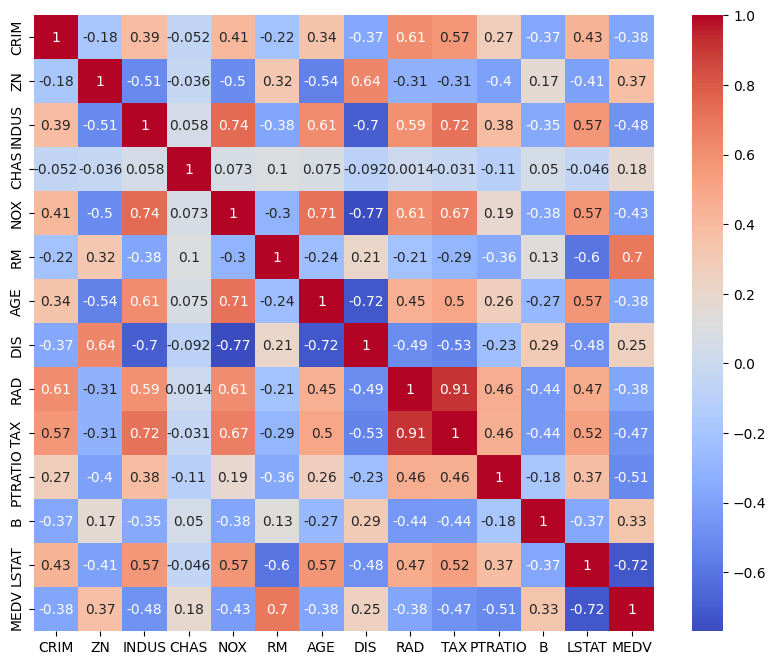

In [5]:
#Exploratory Data Analysis (EDA)

plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

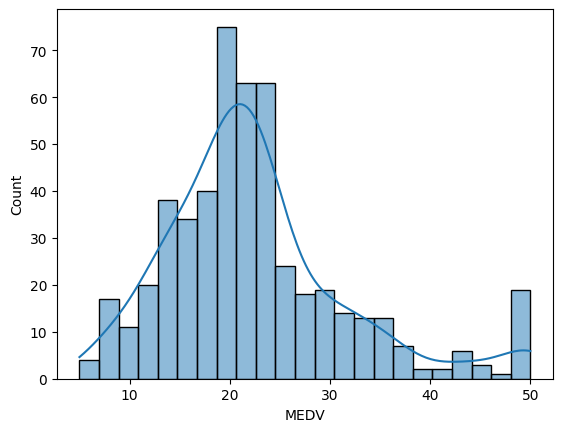

In [6]:
sns.histplot(data['MEDV'], kde=True)
plt.show()

In [7]:
#Feature Scaling

X = data.drop('MEDV', axis=1)
y = data['MEDV']

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
#Model Training

# Linear Regression Model

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('Linear Regression MSE:', mean_squared_error(y_test, y_pred_lr))
print('Linear Regression R2 Score:', r2_score(y_test, y_pred_lr))

Linear Regression MSE: 25.017672023842852
Linear Regression R2 Score: 0.658852019550812


In [9]:
# Decision Tree Regressor Model

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print('Decision Tree MSE:', mean_squared_error(y_test, y_pred_dt))
print('Decision Tree R2 Score:', r2_score(y_test, y_pred_dt))

Decision Tree MSE: 11.273333333333332
Decision Tree R2 Score: 0.8462736702307111


In [10]:
# Random Forest Regressor Model

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Random Forest MSE:', mean_squared_error(y_test, y_pred_rf))
print('Random Forest R2 Score:', r2_score(y_test, y_pred_rf))

Random Forest MSE: 8.24374393137255
Random Forest R2 Score: 0.8875859995747116


In [11]:
#Model Evaluation

# Comparing Mean Squared Error (MSE)

print("Linear Regression: MSE =", mean_squared_error(y_test, y_pred_lr), "R² Score =", r2_score(y_test, y_pred_lr))
print("Decision Tree: MSE =", mean_squared_error(y_test, y_pred_dt), "R² Score =", r2_score(y_test, y_pred_dt))
print("Random Forest: MSE =", mean_squared_error(y_test, y_pred_rf), "R² Score =", r2_score(y_test, y_pred_rf))

Linear Regression: MSE = 25.017672023842852 R² Score = 0.658852019550812
Decision Tree: MSE = 11.273333333333332 R² Score = 0.8462736702307111
Random Forest: MSE = 8.24374393137255 R² Score = 0.8875859995747116


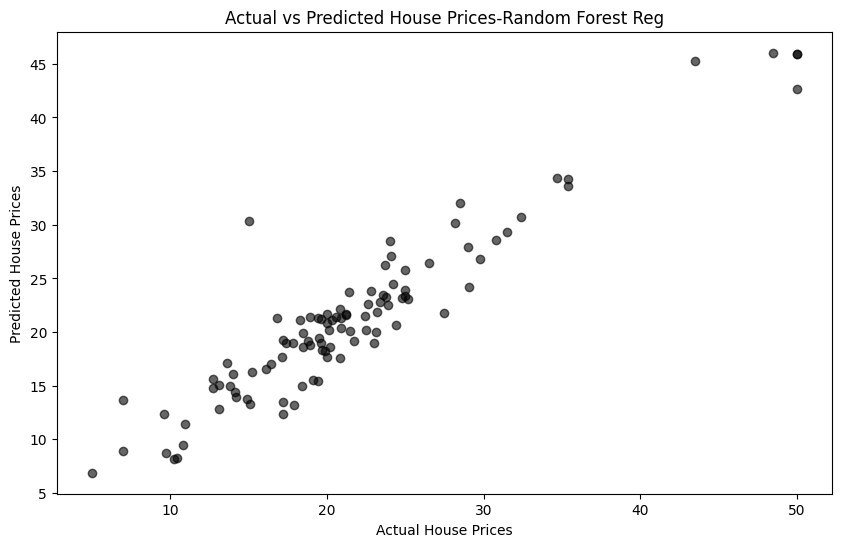

In [12]:
# Plot actual vs predicted house prices for Random Forest Regressor

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='black')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices-Random Forest Reg')
plt.show()